<strong>Import libraries and file from Google Drive

In [4]:
import pandas as pd  
import matplotlib.pyplot as plt 
import statsmodels.formula.api as smf
url='https://drive.google.com/file/d/1prweInVN7k3_w9Hx6Wdr7lp7Ns_WYtsY/view?usp=sharing'
file_id=url.split('/')[-2]
dwn_url='https://drive.google.com/uc?id=' + file_id
df = pd.read_csv(dwn_url)
df.head()

,Price,Size,Number_of_rooms,Number_of_airconditioners,School_level,Number_of_shops_around,Distance_to_the_transport,Number_of_floors
0,334857.6552,113.035368,3,2,0.608501,9,3.988560,7
1,263846.8954,76.520660,4,2,0.601285,7,0.852354,8
2,184884.4481,52.682856,2,0,0.825060,1,1.415011,4
3,311905.2970,107.344950,3,1,0.994735,0,2.880971,8
4,294039.8870,99.057266,2,1,0.719197,2,3.857635,2


<strong>In case the columns name have different symbols and name format isnt sync,
<br>we are going to change the name to X1,X2,...Xk

In [13]:
OrColName=[i for i in df.columns]
AltName=['Y']
for i in range(1,len(df.columns)):
    AltName.append('X'+str(i))
df.columns=AltName    
print ("Database with changed column names","\n"*2,df)

Database with changed column names 

                Y          X1  X2  X3        X4  X5        X6  X7
0    334857.6552  113.035368   3   2  0.608501   9  3.988560   7
1    263846.8954   76.520660   4   2  0.601285   7  0.852354   8
2    184884.4481   52.682856   2   0  0.825060   1  1.415011   4
3    311905.2970  107.344950   3   1  0.994735   0  2.880971   8
4    294039.8870   99.057266   2   1  0.719197   2  3.857635   2
..           ...         ...  ..  ..       ...  ..       ...  ..
995  291091.3487   99.830593   4   1  0.783283   2  3.739833   5
996  305468.4032  100.223081   3   1  0.724573   6  3.224309   6
997  222539.8884   66.559202   3   0  0.986092   5  2.526221   6
998  287524.0570   88.592698   4   2  0.817548   7  2.089430   5
999  273261.7852   86.074428   3   1  0.926725   2  2.342460   2

[1000 rows x 8 columns]


<strong>Plotting colums agains Y to see distribution

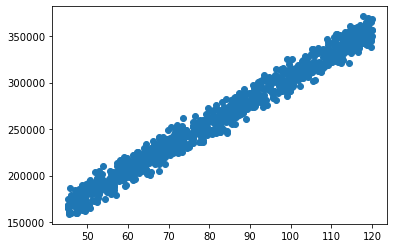

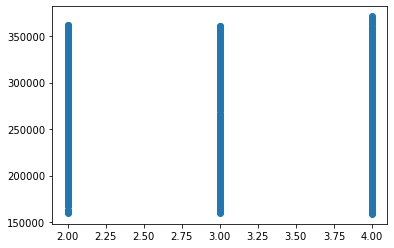

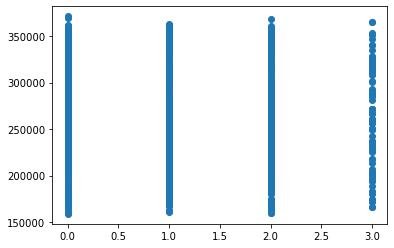

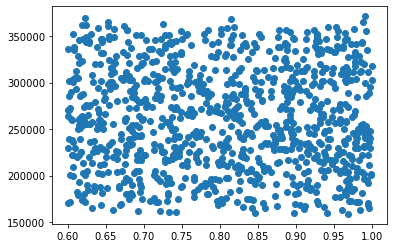

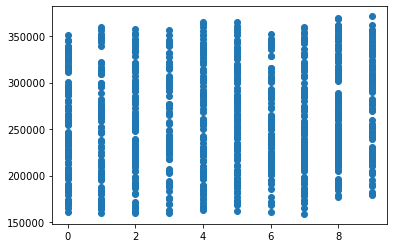

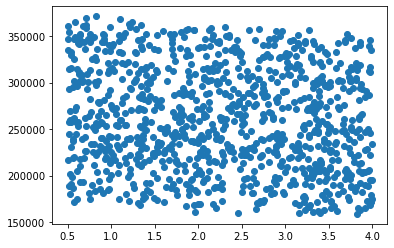

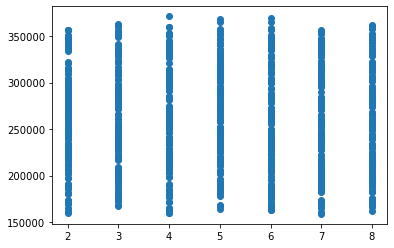

In [14]:
Y=df[df.columns[0]]
X=df.drop(df.columns[0],axis=1)
for i in range(0,len(X.columns)):
    plt.scatter(X[X.columns[i]],Y)
    plt.show()

<strong>Put the dataset into OLS model to check statistic,
<br> here I look at p-value to see the significance relationship to the changes of Y

In [18]:
model=smf.ols(formula='Y ~ X1 + X2 + X3 +X4+ X5 +X6+ X7',data=df)
res = model.fit()
print(res.summary())

                            OLS Regression Results                            
Dep. Variable:                      Y   R-squared:                       0.989
Model:                            OLS   Adj. R-squared:                  0.989
Method:                 Least Squares   F-statistic:                 1.294e+04
Date:                Sun, 26 Jun 2022   Prob (F-statistic):               0.00
Time:                        20:37:05   Log-Likelihood:                -10071.
No. Observations:                1000   AIC:                         2.016e+04
Df Residuals:                     992   BIC:                         2.020e+04
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   5.494e+04   1701.212     32.295      0.0

<h1><strong>For larger datset with large number of columns,
<br> I'm going to make a program to choose only columns with p-value less than 0.1

In [17]:
a=list(range(0,len(df.columns)))
a.pop(0)                           #remove the 1st column as a Y predictor
UpdatedFormula=df.columns[0]+'~'
p=0
Itteration=1
while(p<0.1):
    P_val=[]
    for i in a:
        model=smf.ols(formula=UpdatedFormula + '+' + df.columns[i], data=df)
        res=model.fit()
        P_val.append(res.pvalues[Itteration])
    p=min(P_val)
    if (p<0.1):
        UpdatedFormula=UpdatedFormula + ' + ' + df.columns[a[P_val.index(p)]] 
        Itteration=Itteration+1
        a.pop(P_val.index(p))

model=smf.ols(formula=UpdatedFormula,data=df)
res = model.fit()
print(res.summary())

                            OLS Regression Results                            
Dep. Variable:                      Y   R-squared:                       0.989
Model:                            OLS   Adj. R-squared:                  0.989
Method:                 Least Squares   F-statistic:                 2.267e+04
Date:                Sun, 26 Jun 2022   Prob (F-statistic):               0.00
Time:                        20:33:39   Log-Likelihood:                -10072.
No. Observations:                1000   AIC:                         2.015e+04
Df Residuals:                     995   BIC:                         2.018e+04
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   5.545e+04   1508.672     36.755      0.0